In [8]:
with open("2020-phone/readings.csv") as f:
    rows = f.readlines()
    
period = 52
end = int(rows[1])
readings = [float(e) for e in rows[2:]]
timestamps = [end - ((len(readings) - e_id) * period / 1000) for e_id in range(len(readings)) ]

assert len(readings) == len(timestamps)
readings = list(zip(timestamps, readings))

readings[:5]

[(1674815804.324, 4.97),
 (1674815804.376, -26.75),
 (1674815804.428, 10.82),
 (1674815804.48, 14.51),
 (1674815804.532, 13.28)]

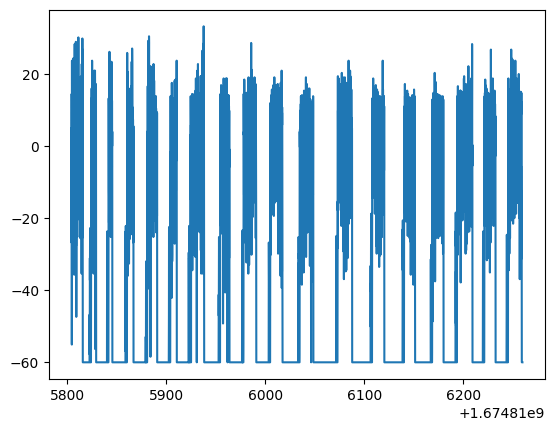

In [9]:
import matplotlib.pyplot as plt
plt.plot([e[0] for e in readings], [e[1] for e in readings])
plt.show()

In [66]:
delim_len = 100

def extract_parts(l, delim):
    indices = [i for i in range(len(l)) if len([e for e in l[i:i + delim_len] if e == delim]) == delim_len]

    # Collect each end-exclusive sublist bounded by each pair indices
    sublists = []
    for i in range(len(indices)-1):
        part = l[indices[i]+1:indices[i+1]]
        sublists.append(part)
    return sublists

In [68]:
chunks = extract_parts([e[1] for e in readings], min([e[1] for e in readings]))
chunks = [e for e in chunks if e != []]

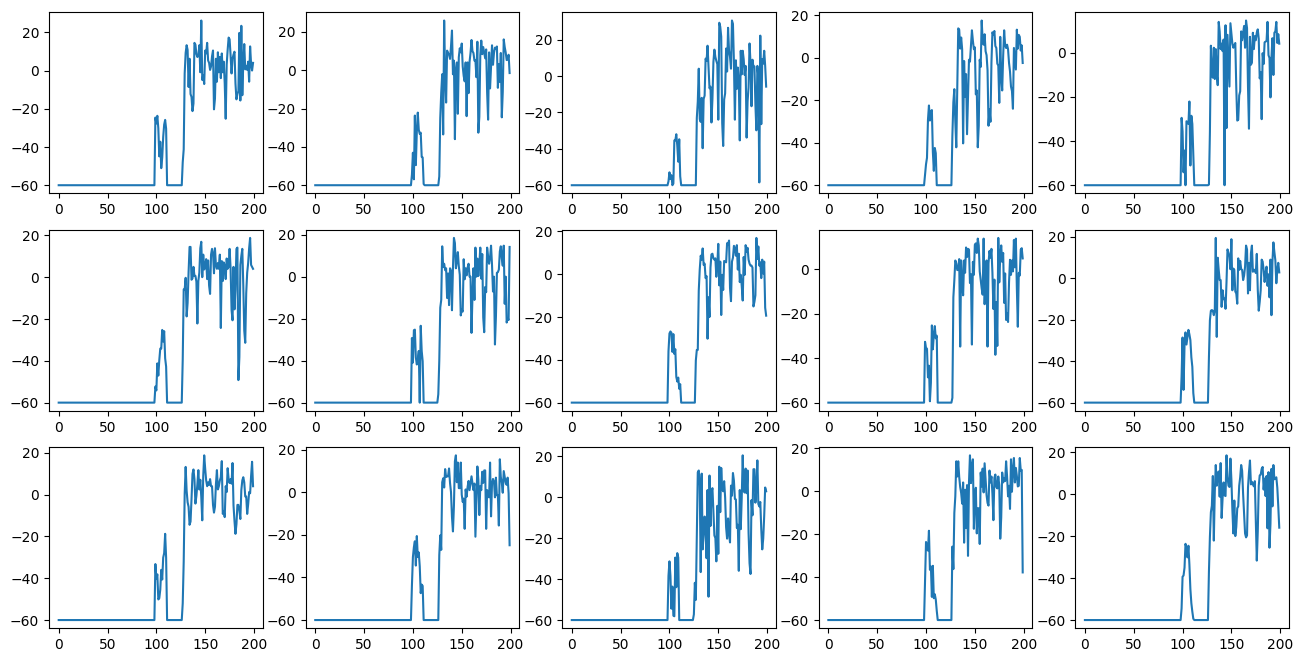

In [82]:
for i in range(1, 16):
    plt.subplot(3, 5, i)
    plt.plot(chunks[i][:delim_len + 100])

plt.gcf().set_size_inches(16, 8)
plt.show()